In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

from google.colab import files

#Upload Files

In [2]:
#Upload every file: dengue_features_train.csv, dengue_lables_train.csv, dengue_features_test.csv
archive = files.upload()

Saving dengue_labels_train.csv to dengue_labels_train.csv
Saving dengue_features_train.csv to dengue_features_train.csv
Saving dengue_features_test.csv to dengue_features_test.csv


In [3]:
df_features = pd.read_csv('dengue_features_train.csv', sep=',')
df_labels = pd.read_csv('dengue_labels_train.csv', sep=',')
train = pd.merge(df_features, df_labels, on=['city', 'year', 'weekofyear'])

print(train.shape)
train.head()

(1456, 25)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [4]:
test = pd.read_csv('dengue_features_test.csv', sep=',')
test.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,294.527143,301.1,296.4,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,294.395714,300.8,296.7,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,299.357143,295.308571,302.2,296.4,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,294.402857,303.0,296.9,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,294.760000,302.3,297.3,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


#Pre-processing

In [5]:
train.drop("week_start_date", axis=1, inplace=True)
test.drop("week_start_date", axis=1, inplace=True)

In [6]:
def remove_null_values(dataframe):
  if pd.isnull(dataframe).any().any():
    dataframe.fillna(method='ffill', inplace=True)

train.apply(remove_null_values)
test.apply(remove_null_values)

print(pd.isnull(train).any().any())
print(pd.isnull(test).any().any())

False
False


In [7]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
train['city_bin'] = lb.fit_transform(train['city'])
test['city_bin'] = lb.fit_transform(test['city'])

#kNN Regression

Min Value uniform : 21.697272727272725 (11)
Min Value distance : 21.536639945099342 (17)


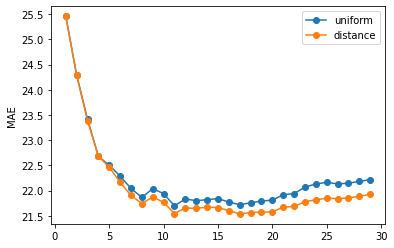

In [8]:
cv = KFold(n_splits = 10, shuffle = False)

for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,30):
       fold_accuracy = []
       knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
       # verificar cada uno de los modelos con validación cruzada.
       for train_fold, test_fold in cv.split(train):
          # División train test aleatoria
          f_train = train.loc[train_fold]
          f_test = train.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit(X = f_train.drop(['total_cases','city'], axis=1), y = f_train['total_cases'])
          y_pred = knn.predict(X = f_test.drop(['total_cases','city'], axis = 1))
          # evaluación del modelo
          mae = mean_absolute_error(f_test['total_cases'], y_pred)
          fold_accuracy.append(mae)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))
   
   plt.plot(range(1,len(total_scores)+1), total_scores, 
             marker='o', label=weights)
   print ('Min Value ' +  weights + " : " +  str(min(total_scores)) +" (" + str(np.argmin(total_scores) + 1) + ")")
   plt.ylabel('MAE')      
    

plt.legend()
plt.show() 

In [9]:
# constructor
n_neighbors = 11
weights = 'uniform'
knn = neighbors.KNeighborsRegressor(n_neighbors= n_neighbors, weights=weights) 
# fit and predict

knn.fit(X = train.drop(['total_cases','city'], axis=1), y = train['total_cases'])
y_pred = knn.predict(X = test.drop(['city'], axis = 1))
#mae = mean_absolute_error(test['total_cases'], y_pred)
#print ('MAE', mae)

In [10]:
Y = np.rint(y_pred)
Y = Y.astype(int)
result = np.hstack(Y)

print(len(result))
result

416


array([ 11,   8,   8,   8,  26,  35,   4,  15,  11,  19,  21,  13,  13,
        34,  68,  16,  55,  32,  34,  48,  27,  25,  58,  38,  27,  38,
        17,  71,  50, 130,  19,  21,  17,  20,  20,  12,  15,  10,  12,
        14,   7,  22,  11,   8,  16,  14,  11,  10,   5,   7,   6,   7,
        14,   8,  14,  20,  24,   6,  13,   4,   8,  34,  21,  22,  14,
        26,  27,  10,  16,  50,  23,  40,   8,  17,  29,  58,  20,  28,
        46,  24,  12,  37,  27,  22,  18,  25,  26,  26,  10,  21,  12,
        13,  10,  10,  12,   8,  13,  21,  14,   9,   7,   9,   5,  13,
        13,  11,   9,  25,  34,  25,  23,  21,  28,  21,  22,  59,  10,
        26,  36,  34,  26,  52,  29,  22,  21,  35,  67,  41,  10,  18,
        19,  30,  26,  64,  27,  32,  19,  19,  13,  22,  14,  14,   8,
        15,  13,   9,  12,  14,   9,  10,   7,   5,  10,   7,   7,   8,
         7,   9,   9,   7,   5,  18,  24,   6,  16,  20,  42,  27,   3,
        10,  16,  39,  30,  27,  17,  39,  18,  53,  12,  26,  1

#Generate Output

In [ ]:
# generate output
output = pd.DataFrame({ 'city': test['city'], 'year': test['year'], 'weekofyear': test['weekofyear'], 'total_cases': result})


from google.colab import files

with open('result.csv', 'w') as f:
  output.to_csv(f,  index = False)
  

files.download('result.csv')

output.head()